# Exercise 2 : Basic Statistics

---

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb # Data Visualization Library
import matplotlib.pyplot as plt # we only need pyplot from matplotlib
sb.set() # set the default Seaborn style 

---

## Problem 1 : Data Preparation

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Get information about the data types using `dtypes`.

In [3]:
houseData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Get more information about the dataset using `info()`.

In [4]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Filter out int64 from HouseData.

In [6]:
houseDataNum = houseData.select_dtypes(include = np.int64)
print("Data dims : ", houseDataNum.shape) 
houseDataNum.info()   # All variables are now int64

Data dims :  (1460, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-

Drop the non-Numeric variables from the DataFrame to obtain a pure Numeric DataFrame.

In [7]:
houseDataNum = houseDataNum.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'], axis = 1)

In [8]:
houseDataNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   BsmtFinSF1     1460 non-null   int64
 3   BsmtFinSF2     1460 non-null   int64
 4   BsmtUnfSF      1460 non-null   int64
 5   TotalBsmtSF    1460 non-null   int64
 6   1stFlrSF       1460 non-null   int64
 7   2ndFlrSF       1460 non-null   int64
 8   LowQualFinSF   1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  BsmtFullBath   1460 non-null   int64
 11  BsmtHalfBath   1460 non-null   int64
 12  FullBath       1460 non-null   int64
 13  HalfBath       1460 non-null   int64
 14  BedroomAbvGr   1460 non-null   int64
 15  KitchenAbvGr   1460 non-null   int64
 16  TotRmsAbvGrd   1460 non-null   int64
 17  Fireplaces     1460 non-null   int64
 18  GarageCars     1460 non-null   int64
 19  Garage

---

## Problem 2 : Statistical Summary

Extract just `SalePrice`, from the DataFrame.

In [9]:
saleprice = pd.DataFrame(houseDataNum['SalePrice'])
print("Data type : ", type(saleprice))
print("Data dims : ", saleprice.size)
saleprice.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  1460


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Summary and Visualization of  `saleprice`.

In [10]:
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


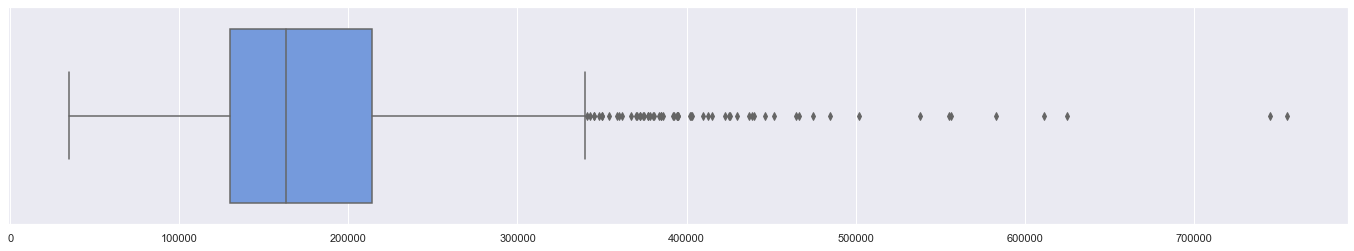

In [11]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(saleprice, orient = "h", color = "cornflowerblue")

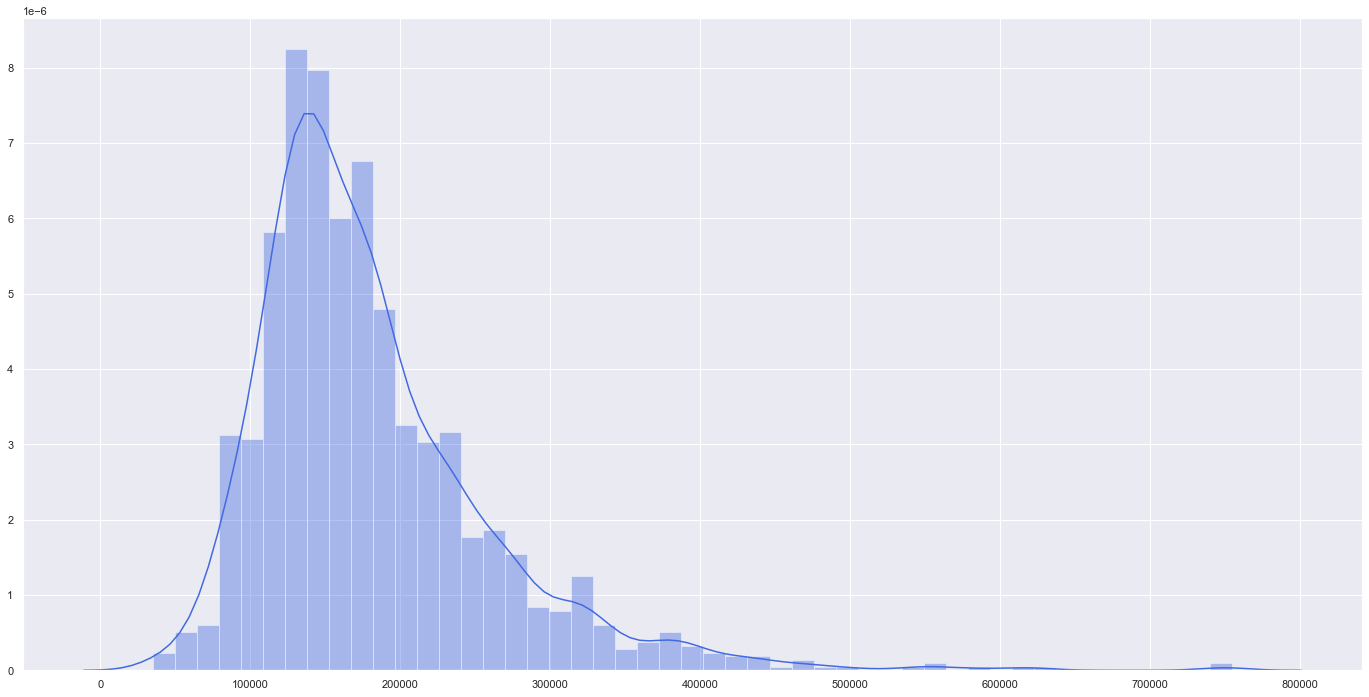

In [12]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(saleprice, color = "royalblue")

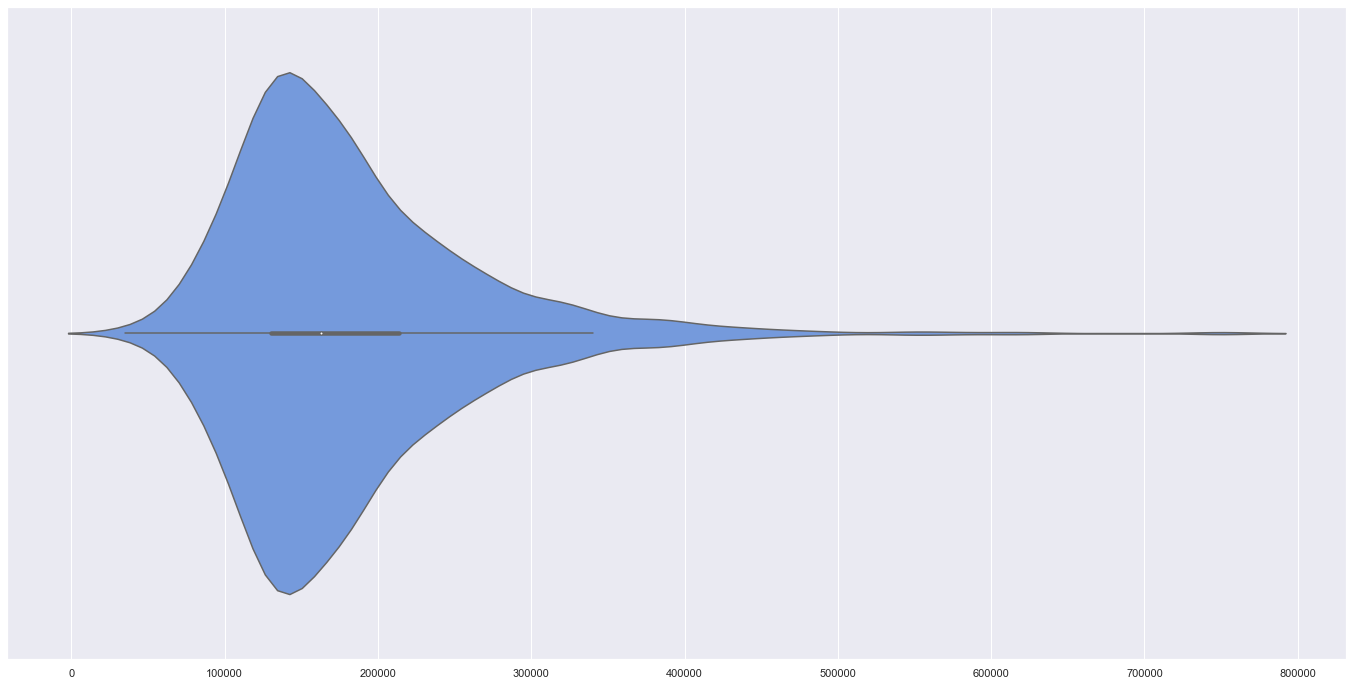

In [13]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.violinplot(saleprice, color = "cornflowerblue")

Summary and Visualization of `LotArea`

In [14]:
lotarea = pd.DataFrame(houseDataNum['LotArea'])
print("Data type : ", type(lotarea))
print("Data dims : ", lotarea.size)
lotarea.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  1460


,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [15]:
lotarea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


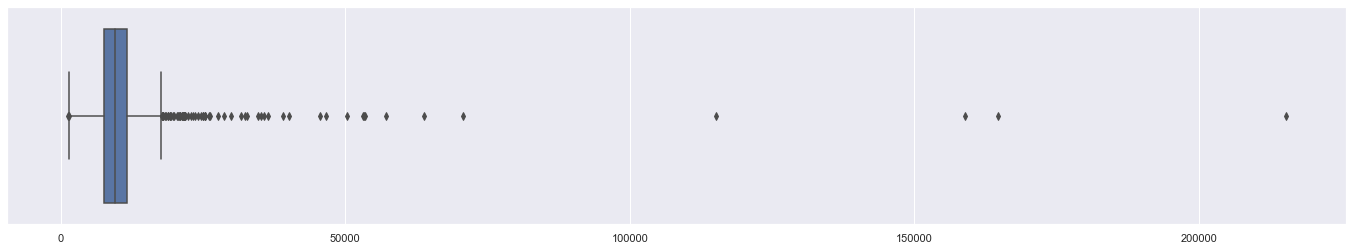

In [16]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(lotarea, orient = "h")

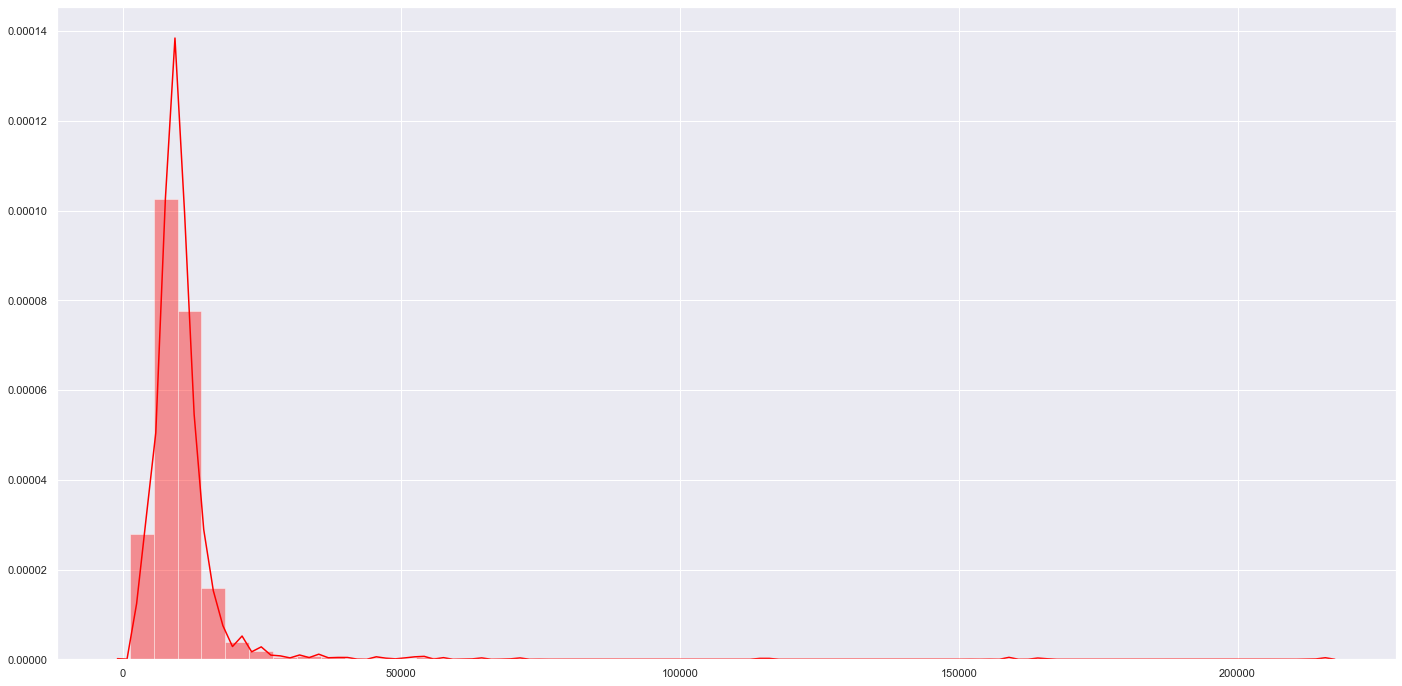

In [17]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(lotarea, color = "red")

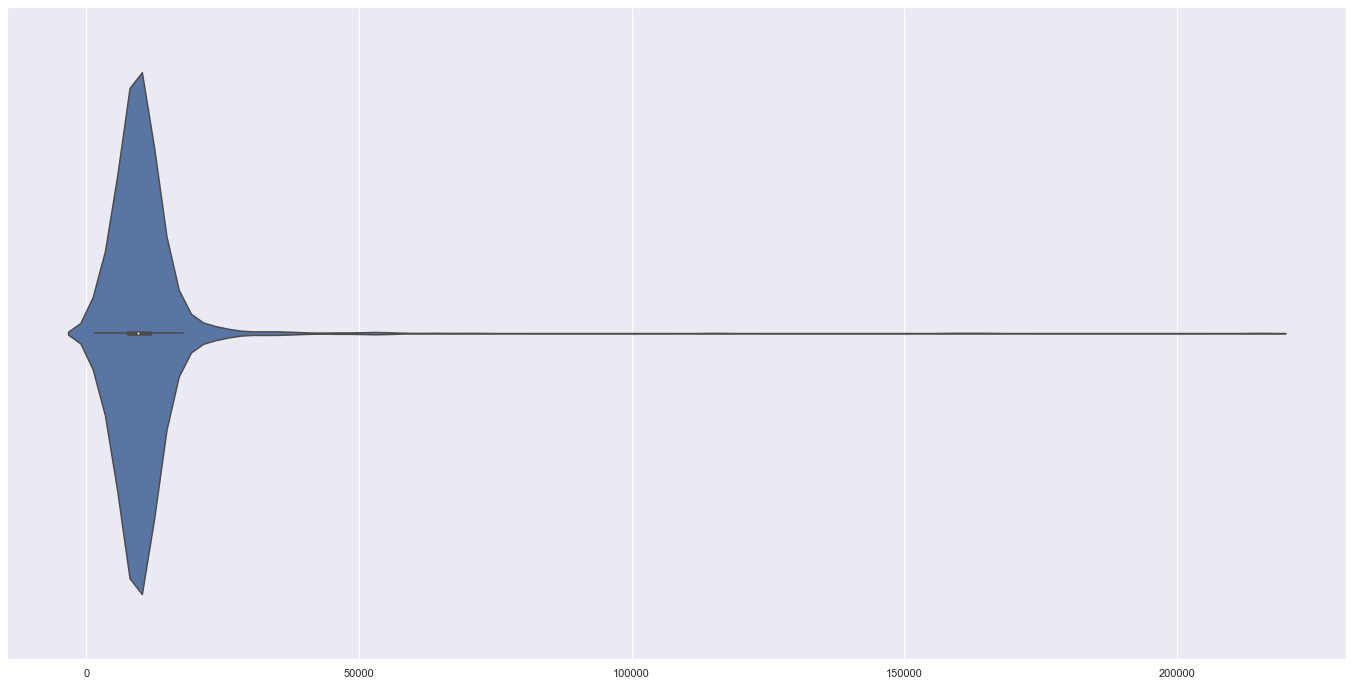

In [18]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.violinplot(lotarea)

Extract two variables `SalePrice` and `LotArea` check their mutual relationship.

In [19]:
saleprice = pd.DataFrame(houseDataNum['SalePrice'])
lotarea = pd.DataFrame(houseDataNum['LotArea'])

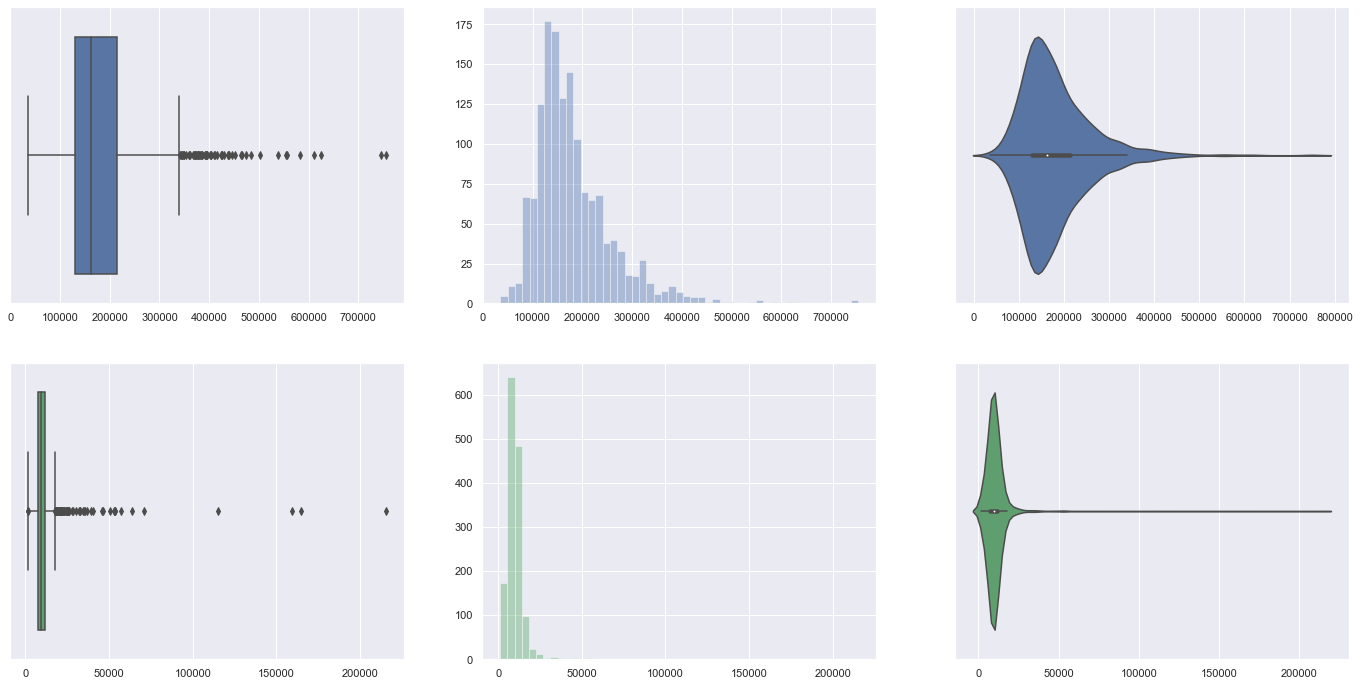

In [20]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(saleprice, orient = "h", ax = axes[0,0])
sb.distplot(saleprice, kde = False, ax = axes[0,1])
sb.violinplot(saleprice, ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(lotarea, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(lotarea, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(lotarea, ax = axes[1,2], color = 'g')

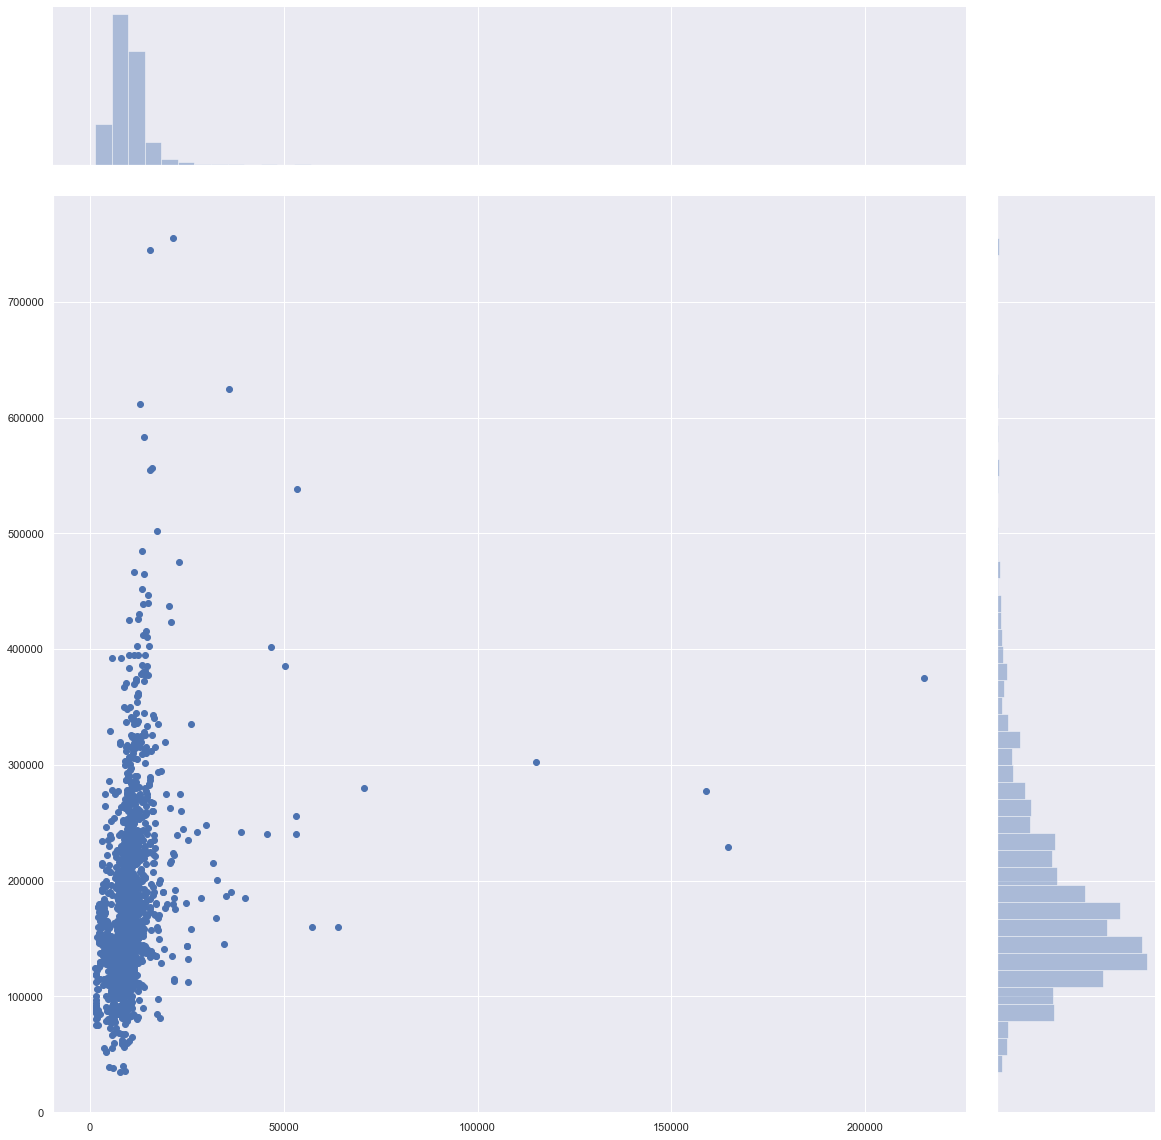

In [21]:
sb.jointplot(x = lotarea, y = saleprice, height = 16)

In [23]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([lotarea, saleprice], axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


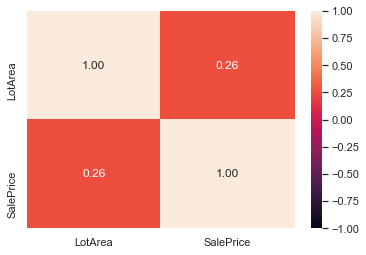

In [24]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")